## 1) Libraries Installation
##### The cell below is to help you keep track the libraries used and install them quickly.
##### Ensure the correct library names are used, and follow the syntax: **%pip install PACKAGE_NAME**.

In [ ]:
library(rsample)
library(slider)
library(tidyverse)
library(lubridate)
library(readxl)
library(corrplot)
library(forecast)
library(xgboost)

ERROR: Error in library(rsample): there is no package called ‘rsample’


## 2) Main Section for Code
### **ALL code for machine learning and dataset analysis** should be entered below.
##### Ensure that your code is clear and readable.
##### Remember to include comments and markdown notes as necessary to explain and highlight important segments of your code.

In [ ]:
data <- read.csv("Quarterly Data.csv")


In [ ]:
#remove data have alot of NA values CPF3MTB3Mx (157), MORTG10YRx(153), REVOLSLx(167), DRIWCIL (169), USSTHPI(179), 178, 180,181,182,183,188,189....191, 192, 21, 33, 69:72, 75, 78, 83, 88:89, 91, 93:94, 128, 130:131, 134, 137, 141, 149 ))

data <- data %>% select(-c(22, 34, 70:73, 76, 79, 84, 89, 90, 92, 94, 95, 129, 131, 132, 135, 138, 142, 150, 154, 158, 166, 168, 177:182, 187, 188, 191, 192, 220, 224:229, 231, 232))


In [ ]:
numeric_data <- data[-c(1, 2), ]  # Remove the first two rows
numeric_data <- numeric_data[, sapply(numeric_data, is.numeric)]  # Select only numeric columns

# Step 3: Compute the correlation matrix
correlation_matrix <- cor(numeric_data, use = "complete.obs")  # 'complete.obs' removes NA value
correlation_matrix

,GDPC1,PCECC96,PCDGx,PCESVx,PCNDx,GPDIC1,FPIx,Y033RC1Q027SBEAx,PNFIx,PRFIx,⋯,TNWMVBSNNCBBDIx,TLBSNNBx,TLBSNNBBDIx,TABSNNBx,TNWBSNNBx,TNWBSNNBBDIx,CNCFx,S.P.500,S.P.div.yield,S.P.PE.ratio
GDPC1,1.000000000,0.99949439,0.957827645,0.99813896,0.996713218,0.986940150,0.989624715,0.97906609,0.9831983303,0.78346536,⋯,0.008016027,0.97217376,0.73670520,0.97367849,0.96370494,-0.7849480,0.976364975,0.89217318,-0.7063766,0.48763816
PCECC96,0.999494392,1.00000000,0.963787991,0.99701829,0.997664785,0.987442456,0.990326768,0.98126989,0.9857352728,0.77648930,⋯,0.002896005,0.97731018,0.74290332,0.97801170,0.96723402,-0.7729063,0.978486829,0.89897261,-0.7049684,0.48929425
PCDGx,0.957827645,0.96378799,1.000000000,0.94081556,0.973376828,0.975058780,0.975891504,0.97644847,0.9873136830,0.70251657,⋯,-0.017077148,0.98516184,0.77237729,0.98980931,0.98124403,-0.6199934,0.947857263,0.97145448,-0.6678026,0.45863713
PCESVx,0.998138960,0.99701829,0.940815557,1.00000000,0.991240512,0.977586077,0.980926394,0.96949938,0.9724919489,0.78352139,⋯,0.006088314,0.96166535,0.72255033,0.96120563,0.94989235,-0.8071628,0.974258094,0.86767717,-0.7031908,0.48956123
PCNDx,0.996713218,0.99766479,0.973376828,0.99124051,1.000000000,0.989435422,0.992294742,0.97894069,0.9877506009,0.78022637,⋯,0.022883927,0.98039290,0.75382408,0.98524987,0.97776633,-0.7595103,0.973108900,0.91763820,-0.6941608,0.48348289
GPDIC1,0.986940150,0.98744246,0.975058780,0.97758608,0.989435422,1.000000000,0.998849744,0.98807853,0.9918518012,0.80233764,⋯,0.041094864,0.96849566,0.74951727,0.98073363,0.97975190,-0.7122127,0.955182312,0.93157415,-0.7181116,0.46330566
FPIx,0.989624715,0.99032677,0.975891504,0.98092639,0.992294742,0.998849744,1.000000000,0.98776732,0.9928278717,0.80282909,⋯,0.043311657,0.97245585,0.75591699,0.98342990,0.98132281,-0.7177942,0.958847658,0.92954660,-0.7166876,0.47283675
Y033RC1Q027SBEAx,0.979066086,0.98126989,0.976448472,0.96949938,0.978940690,0.988078531,0.987767317,1.00000000,0.9946705062,0.72208602,⋯,-0.029000848,0.98014861,0.75263992,0.97984457,0.96794807,-0.6827399,0.966312330,0.92206220,-0.6995923,0.44375504
PNFIx,0.983198330,0.98573527,0.987313683,0.97249195,0.987750601,0.991851801,0.992827872,0.99467051,1.0000000000,0.72741853,⋯,-0.006879066,0.98597660,0.76185950,0.98881443,0.97923467,-0.6875720,0.966330393,0.94567257,-0.6905516,0.45444074
PRFIx,0.783465362,0.77648930,0.702516570,0.78352139,0.780226367,0.802337643,0.802829089,0.72208602,0.7274185276,1.00000000,⋯,0.283974588,0.67924894,0.55789639,0.73081087,0.76842755,-0.6689773,0.689760392,0.65212299,-0.6820581,0.44337900


In [ ]:
highly_correlated_vars <- names(which(abs(correlation_matrix["GDPC1", ]) > 0.9))
filtered_data <- data %>% select(all_of(highly_correlated_vars))
str(filtered_data)
filtered_data$time <- dmy(data[,1])

'data.frame':	265 obs. of  114 variables:
 $ GDPC1           : num  0 5 3352 3428 3430 ...
 $ PCECC96         : num  0 5 2039 2071 2092 ...
 $ PCDGx           : num  1 5 68.7 71.2 72.6 ...
 $ PCESVx          : num  1 5 1374 1395 1414 ...
 $ PCNDx           : num  1 5 689 695 697 ...
 $ GPDIC1          : num  0 5 355 382 358 ...
 $ FPIx            : num  0 5 357 368 372 ...
 $ Y033RC1Q027SBEAx: num  1 5 47.8 49.2 50.8 ...
 $ PNFIx           : num  1 5 171 176 181 ...
 $ GCEC1           : num  0 5 1143 1157 1167 ...
 $ FGRECPTx        : num  1 5 556 579 565 ...
 $ SLCEx           : num  1 5 531 533 533 ...
 $ EXPGSC1         : num  1 5 89.7 89 97.6 ...
 $ IMPGSC1         : num  1 5 115 121 122 ...
 $ DPIC96          : num  0 5 2327 2365 2362 ...
 $ OUTNFB          : num  0 5 14.4 14.9 14.8 ...
 $ OUTBS           : num  0 5 14.6 15 15 ...
 $ INDPRO          : num  0 5 22.4 23.4 22.5 ...
 $ IPFINAL         : num  0 5 22.4 23.1 23.4 ...
 $ IPCONGD         : num  0 5 31.8 32.5 32.8 ...
 $ IP

Warning message:
“ 2 failed to parse.”


In [ ]:
set.seed(888)
filtered_data_1 <- filtered_data %>% filter(!is.na(time))
splits <- sliding_period(
  filtered_data_1, index = time, period = "quarter", lookback = 20, assess_stop = 4
)

# Extract first rolling window
train_1 <- training(splits$splits[[1]])  # First 20 quarters
test_1  <- testing(splits$splits[[1]])   # Next quarter

# Extract second rolling window (shifts 1 quarter forward)
train_2 <- training(splits$splits[[2]])
test_2  <- testing(splits$splits[[2]])

# Check first training and test sets
print(head(train_1))
print(test_1)

     GDPC1  PCECC96   PCDGx   PCESVx    PCNDx  GPDIC1     FPIx Y033RC1Q027SBEAx
1 3352.129 2039.017 68.6651 1374.174 689.1172 354.894 357.0174          47.8021
2 3427.667 2070.508 71.2495 1394.710 694.8197 382.500 368.0640          49.2332
3 3430.057 2092.138 72.6270 1413.663 697.4699 357.798 371.9585          50.8372
4 3439.832 2094.495 69.1573 1430.816 701.7617 369.442 367.6452          50.7342
5 3517.181 2114.532 71.3815 1443.741 703.5338 406.581 379.9162          52.4985
6 3498.246 2141.205 73.0060 1459.742 711.2267 368.686 373.0131          53.3837
     PNFIx    GCEC1 FGRECPTx    SLCEx EXPGSC1 IMPGSC1   DPIC96 OUTNFB  OUTBS
1 171.0783 1142.671 556.0802 531.4011  89.697 115.440 2327.444 14.441 14.606
2 176.0004 1156.740 578.9494 532.5791  88.981 121.057 2364.977 14.857 14.988
3 180.7406 1166.589 564.7381 532.8908  97.562 122.212 2361.784 14.834 14.960
4 180.2333 1157.052 566.5192 530.0971  92.734 119.109 2378.605 14.790 14.966
5 186.4967 1137.363 618.3418 539.0478 104.686 123.608 2

In [ ]:
# Select only numeric columns, excluding the target variable GDPC1
numeric_train_1 <- train_1[, sapply(train_1, is.numeric)]

# Calculate the correlation matrix (excluding GDPC1)
cor_matrix <- cor(numeric_train_1[, -which(names(numeric_train_1) == "GDPC1")], use = "complete.obs")

# Find the upper triangle of the correlation matrix to avoid duplicate pairs
upper_tri <- upper.tri(cor_matrix)

# Identify pairs of variables with correlation > 0.9
highly_correlated_pairs <- which(upper_tri & abs(cor_matrix) > 0.9, arr.ind = TRUE)

# Extract the names of the variables involved in the highly correlated pairs
correlated_vars <- unique(c(
  colnames(cor_matrix)[highly_correlated_pairs[, 1]],
  colnames(cor_matrix)[highly_correlated_pairs[, 2]]
))

# Remove the highly correlated variables from the dataset
train_1_clean <- train_1[, !names(train_1) %in% correlated_vars]
train_1_clean <- train_1_clean %>% select(-time)


In [ ]:
correlated_vars

[1] "PCECC96"          "PCDGx"            "PCESVx"          
  [4] "GPDIC1"           "FPIx"             "GCEC1"           
  [7] "Y033RC1Q027SBEAx" "PNFIx"            "IMPGSC1"         
 [10] "OUTNFB"           "EXPGSC1"          "INDPRO"          
 [13] "IPFINAL"          "IPMAT"            "IPCONGD"         
 [16] "IPDCONGD"         "IPDMAT"           "PAYEMS"          
 [19] "USPRIV"           "OUTBS"            "SRVPRD"          
 [22] "USCONS"           "USFIRE"           "USLAH"           
 [25] "USPBS"            "IPBUSEQ"          "USSERV"          
 [28] "USGOVT"           "USEHS"            "USTPU"           
 [31] "USTRADE"          "CE16OV"           "HOABS"           
 [34] "PCECTPI"          "PCEPILFE"         "GDPCTPI"         
 [37] "GPDICTPI"         "IPDBS"            "DGDSRG3Q086SBEA" 
 [40] "DSERRG3Q086SBEA"  "DNDGRG3Q086SBEA"  "DHCERG3Q086SBEA" 
 [43] "DMOTRG3Q086SBEA"  "DFXARG3Q086SBEA"  "DONGRG3Q086SBEA" 
 [46] "PCNDx"            "DHUTRG3Q086SBEA"  "DHLCRG3Q086SBEA" 
 [49] "DTRSRG3Q086SBEA"  "DRCARG3Q086SBEA"  "DFSARG3Q086SBEA" 
 [52] "DIFSRG3Q086SBEA"  "DOTSRG3Q086SBEA"  "CPIAUCSL"        
 [55] "DGOERG3Q086SBEA"  "CPILFESL"         "WPSFD49207"      
 [58] "PPIACO"           "WPSFD49502"       "WPSFD4111"       
 [61] "FGRECPTx"         "PPIIDC"           "COMPRNFB"        
 [64] "OPHNFB"           "WPSID61"          "ULCBS"           
 [67] "ULCNFB"           "UNLPNBS"          "M2REAL"          
 [70] "NONREVSLx"        "TABSHNOx"         "TNWBSHNOx"       
 [73] "TLBSHNOx"         "TARESAx"          "HOANBS"          
 [76] "TOTALSLx"         "HNOREMQ027Sx"     "WPSID62"         
 [79] "CPITRNSL"         "CPIMEDSL"         "CUSR0000SAC"     
 [82] "CUSR0000SAS"      "CPIULFSL"         "CUSR0000SA0L2"   
 [85] "CUSR0000SA0L5"    "CES0600000008"    "DTCOLNVHFNM"     
 [88] "INVEST"           "TFAABSHNOx"       "TTAABSNNCBx"     
 [91] "OPHPBS"           "TNWMVBSNNCBx"     "TLBSNNBx"        
 [94] "TABSNNBx"         "SLCEx"            "IPB51110SQ"      
 [97] "CES9093000001"    "RCPHBS"           "CONSUMERx"       
[100] "IPMANSICS"        "DTCTHFNM"         "BUSINVx"         
[103] "TNWBSNNBx"

In [ ]:
# Select only numeric columns, excluding the target variable GDPC1
numeric_train_2 <- train_2[, sapply(train_2, is.numeric)]

# Calculate the correlation matrix (excluding GDPC1)
cor_matrix <- cor(numeric_train_2[, -which(names(numeric_train_2) == "GDPC1")], use = "complete.obs")

# Find the upper triangle of the correlation matrix to avoid duplicate pairs
upper_tri <- upper.tri(cor_matrix)

# Identify pairs of variables with correlation > 0.9
highly_correlated_pairs <- which(upper_tri & abs(cor_matrix) > 0.9, arr.ind = TRUE)

# Extract the names of the variables involved in the highly correlated pairs
correlated_vars <- unique(c(
  colnames(cor_matrix)[highly_correlated_pairs[, 1]],
  colnames(cor_matrix)[highly_correlated_pairs[, 2]]
))

# Remove the highly correlated variables from the dataset
train_2_clean <- train_2[, !names(train_1) %in% correlated_vars]
train_2_clean <- train_2_clean %>% select(-time)


In [ ]:


lm_model_1 <- lm(GDPC1 ~ ., data = train_1_clean)  # All variables as predictors, with GDPC1 as the target

# Summary of the model
summary(lm_model_1)

# Make predictions on the test set
lm_predictions_1 <- predict(lm_model_1, newdata = test_1)

# Calculate RMSE for the first window
rmse_1 <- sqrt(mean((lm_predictions_1 - test_1$GDPC1)^2))

# Print RMSE for the first window
print(paste("RMSE for the first window: ", rmse_1))

# Repeat the process for the second window (train_2, test_2)
lm_model_2 <- lm(GDPC1 ~ ., data = train_2_clean)

# Make predictions on the second test set
lm_predictions_2 <- predict(lm_model_2, newdata = test_2)

# Calculate RMSE for the second window
rmse_2 <- sqrt(mean((lm_predictions_2 - test_2$GDPC1)^2))

# Print RMSE for the second window
print(paste("RMSE for the second window: ", rmse_2))



Call:
lm(formula = GDPC1 ~ ., data = train_1_clean)

Residuals:
    Min      1Q  Median      3Q     Max 
-114.95  -32.61    0.19   31.26  112.70 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)     6798.94546 9542.99532   0.712   0.4888    
USCONS             2.49744    0.39272   6.359  2.5e-05 ***
GPDICTPI         -69.51068  277.11700  -0.251   0.8059    
DGOERG3Q086SBEA  117.22167  215.84495   0.543   0.5963    
PPIACO           767.78586  365.43264   2.101   0.0557 .  
PPIIDC           153.24513  478.90855   0.320   0.7541    
WPSID61         -894.62796  368.29029  -2.429   0.0304 *  
B021RE1Q156NBEA  -72.03336  300.51452  -0.240   0.8143    
WPSID62         -349.71710  114.87248  -3.044   0.0094 ** 
DTCOLNVHFNM       -0.04848    0.11933  -0.406   0.6912    
TNWMVBSNNCBx      -0.26157    0.23661  -1.106   0.2890    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 74.57 on 13 degrees of freedom
Multip

[1] "RMSE for the first window:  429.604161726332"
[1] "RMSE for the second window:  43.7049042549603"


#### Remember to rename your file name to **NUS_DSESC_DATABUSTERS_XX.ipynb** and ensure that it can run successfully. Good luck and have fun!

In [ ]:
lm_predictions_1

1        2        3        4 
4358.818 4039.039 4034.265 4016.394

In [ ]:
lm_predictions_2

1        2        3        4 
4740.607 4755.880 4791.374 4740.973

In [ ]:
str(filtered_data)

'data.frame':	265 obs. of  115 variables:
 $ GDPC1           : num  0 5 3352 3428 3430 ...
 $ PCECC96         : num  0 5 2039 2071 2092 ...
 $ PCDGx           : num  1 5 68.7 71.2 72.6 ...
 $ PCESVx          : num  1 5 1374 1395 1414 ...
 $ PCNDx           : num  1 5 689 695 697 ...
 $ GPDIC1          : num  0 5 355 382 358 ...
 $ FPIx            : num  0 5 357 368 372 ...
 $ Y033RC1Q027SBEAx: num  1 5 47.8 49.2 50.8 ...
 $ PNFIx           : num  1 5 171 176 181 ...
 $ GCEC1           : num  0 5 1143 1157 1167 ...
 $ FGRECPTx        : num  1 5 556 579 565 ...
 $ SLCEx           : num  1 5 531 533 533 ...
 $ EXPGSC1         : num  1 5 89.7 89 97.6 ...
 $ IMPGSC1         : num  1 5 115 121 122 ...
 $ DPIC96          : num  0 5 2327 2365 2362 ...
 $ OUTNFB          : num  0 5 14.4 14.9 14.8 ...
 $ OUTBS           : num  0 5 14.6 15 15 ...
 $ INDPRO          : num  0 5 22.4 23.4 22.5 ...
 $ IPFINAL         : num  0 5 22.4 23.1 23.4 ...
 $ IPCONGD         : num  0 5 31.8 32.5 32.8 ...
 $ IP

In [ ]:
# Ensuring there are no missing values in the 'time' column
filtered_data_p <- filtered_data %>% filter(!is.na(time))

# Start from row 241
filtered_data_p <- filtered_data[241:nrow(filtered_data_p), ]

# Creating the sliding windows
splits <- sliding_period(
  filtered_data_p, index = time, period = "quarter", lookback = 20, assess_stop = 4
)

# Extracting first rolling window
train_p <- training(splits$splits[[1]])  # 20 quarters
test_p  <- testing(splits$splits[[1]])   # Next 4 quarters after 20 quarters

# Checking first training and test sets
print(head(train_p))
print(head(test_p))


     GDPC1  PCECC96    PCDGx   PCESVx    PCNDx   GPDIC1     FPIx
1 20276.15 13693.79 1516.439 9308.227 2869.964 3722.248 3623.394
2 20304.87 13736.57 1519.059 9328.665 2889.733 3724.752 3632.777
3 20431.64 13758.33 1505.760 9338.298 2914.860 3755.530 3643.056
4 20602.28 13875.70 1549.628 9380.629 2947.841 3790.049 3710.657
5 20843.32 14033.22 1585.937 9474.127 2976.311 3819.940 3750.039
6 20985.45 14125.27 1598.462 9549.946 2978.960 3770.431 3739.326
  Y033RC1Q027SBEAx    PNFIx    GCEC1 FGRECPTx    SLCEx  EXPGSC1  IMPGSC1
1         1225.121 2854.551 3483.628 3540.849 2164.699 2441.791 3064.175
2         1241.129 2880.387 3488.352 3527.029 2163.224 2451.936 3096.191
3         1247.960 2899.845 3536.600 3534.576 2197.017 2474.928 3094.294
4         1260.649 2954.980 3584.587 3542.938 2231.332 2462.392 3111.425
5         1241.894 2983.503 3625.512 3559.248 2255.381 2462.912 3097.883
6         1213.847 2970.291 3654.831 3612.733 2277.043 2477.908 3039.834
    DPIC96  OUTNFB   OUTBS   INDPR

In [ ]:
# Select only numeric columns, excluding the target variable GDPC1
numeric_train_p <- train_p[, sapply(train_1, is.numeric)]

# Calculate the correlation matrix (excluding GDPC1)
cor_matrix <- cor(numeric_train_p[, -which(names(numeric_train_1) == "GDPC1")], use = "complete.obs")

# Find the upper triangle of the correlation matrix to avoid duplicate pairs
upper_tri <- upper.tri(cor_matrix)

# Identify pairs of variables with correlation > 0.9
highly_correlated_pairs <- which(upper_tri & abs(cor_matrix) > 0.9, arr.ind = TRUE)

# Extract the names of the variables involved in the highly correlated pairs
correlated_vars <- unique(c(
  colnames(cor_matrix)[highly_correlated_pairs[, 1]],
  colnames(cor_matrix)[highly_correlated_pairs[, 2]]
))

# Remove the highly correlated variables from the dataset
train_p_clean <- train_p[, !names(train_p) %in% correlated_vars]
train_p_clear <- train_p_clean %>% select(-time)



In [ ]:
test_p

GDPC1,PCECC96,PCDGx,PCESVx,PCNDx,GPDIC1,FPIx,Y033RC1Q027SBEAx,PNFIx,GCEC1,⋯,INVEST,BUSINVx,TLBSNNCBx,TTAABSNNCBx,TNWMVBSNNCBx,TLBSNNBx,TABSNNBx,TNWBSNNBx,CNCFx,time
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<date>
23053.54,15856.87,1995.887,10510.67,3374.31,4282.515,4231.167,1295.756,3470.987,3887.718,⋯,5145.065,2537397,23.23,24.38,26356.01,9265108,21807601,12418.85,2356.684,2024-01-03


In [ ]:
lm_model_p <- lm(GDPC1 ~ ., data = train_p_clean)  # All variables as predictors, with GDPC1 as the target

# Summary of the model
summary(lm_model_p)

# Make predictions on the test set
lm_predictions_p <- predict(lm_model_p, newdata = test_p)

# Calculate RMSE for the first window
rmse_p <- sqrt(mean((lm_predictions_p - test_p$GDPC1)^2))
print(rmse_p)



Call:
lm(formula = GDPC1 ~ ., data = train_p_clean)

Residuals:
    Min      1Q  Median      3Q     Max 
-237.02  -87.38  -14.92  111.02  224.72 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)     17960.8041  9643.0075   1.863 0.092125 .  
DPIC96             -0.1211     0.1434  -0.844 0.418249    
IPB51220SQ        274.6822   146.8822   1.870 0.090995 .  
CES9092000001      -2.9934     1.8038  -1.659 0.128006    
BUSLOANSx          -6.9566     1.4837  -4.689 0.000856 ***
REALLNx             2.7274     1.2835   2.125 0.059527 .  
B021RE1Q156NBEA    67.6270   207.4763   0.326 0.751180    
IPB51222S        -127.6026    77.9955  -1.636 0.132878    
IPFUELS          -167.5690    81.8786  -2.047 0.067899 .  
TLBSNNCBx         198.1180   138.3389   1.432 0.182616    
CNCFx               2.5281     0.5377   4.701 0.000840 ***
time                0.8203     0.3235   2.536 0.029588 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Res

[1] 94.52636


In [ ]:
lm_predictions_p

1        2        3        4 
22895.93 22933.29 22992.56 23207.99

In [ ]:
gdp_ts <- ts(filtered_data$GDPC1)
fit <- auto.arima(gdp_ts)
forecasted_values <- forecast(fit, h = 5)
print(forecasted_values) #using GDP to forecast next

    Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
266       23466.40 23134.57 23798.24 22958.91 23973.90
267       23539.13 23085.84 23992.42 22845.89 24232.38
268       23616.49 23076.84 24156.13 22791.17 24441.80
269       23696.92 23087.95 24305.88 22765.59 24628.25
270       23779.40 23111.18 24447.61 22757.45 24801.34


In [ ]:
###XGBOOST

data <- read.csv("Quarterly Data.csv")
data<- data %>% select(-c(22, 34, 70:73, 76, 79, 84, 89, 90, 92, 94, 95, 129, 131, 132, 135, 138, 142, 150, 154, 158, 166, 168, 177:182, 187, 188, 191, 192, 220, 224:229, 231, 232))

data <- data %>%
  arrange(sasdate) %>%
  mutate(
    contraction_next_qtr = ifelse(is.na(lead(GDPC1, 1)), 0, ifelse(lead(GDPC1, 1) < GDPC1, 1, 0)),
    contraction_2q_ahead = ifelse(is.na(lead(GDPC1, 2)), 0, ifelse(lead(GDPC1, 2) < GDPC1, 1, 0)),
    contraction_next_year = ifelse(is.na(lead(GDPC1, 4)), 0, ifelse(lead(GDPC1, 4) < GDPC1, 1, 0))
  )
set.seed(888)
trainIndex <- sample(1:nrow(data), 0.8 * nrow(data))

# Split data
train_data <- data[trainIndex, ]
test_data <- data[-trainIndex, ]

# Extract labels before converting to matrix
train_labels <- train_data$contraction_next_qtr
test_labels <- test_data$contraction_next_qtr

# Create numeric matrices (excluding target variable)
train_matrix <- data.matrix(train_data %>% select(-contraction_next_qtr))
test_matrix <- data.matrix(test_data %>% select(-contraction_next_qtr))

# Create xgb.DMatrix
train_dmatrix <- xgb.DMatrix(data = train_matrix, label = train_labels)
test_dmatrix <- xgb.DMatrix(data = test_matrix, label = test_labels)

# Train the model
xgb_model <- xgboost(
  data = train_dmatrix,
  max.depth = 6,
  nrounds = 100,
  objective = "binary:logistic",
  eval_metric = "logloss"
)

# Initialize a dataframe to store predictions
future_predictions <- data.frame(
  quarter_ahead = integer(0),
  contraction_prob = numeric(0),
  contraction_prediction = integer(0)
)

latest_data <- tail(test_data, 1) %>% select(-contraction_next_qtr)
latest_data_matrix <- data.matrix(latest_data)

# Create xgb.DMatrix
latest_matrix <- xgb.DMatrix(data = latest_data_matrix)

# Predict contraction probability for the next quarter
next_qtr_prob <- predict(xgb_model, latest_matrix)

# Convert probability to binary (1 = Contraction, 0 = No Contraction)
next_qtr_prediction <- ifelse(next_qtr_prob > 0.5, 1, 0)

# Store the result for next quarter
future_predictions <- rbind(future_predictions,
                            data.frame(quarter_ahead = 1,
                                       contraction_prob = next_qtr_prob,
                                       contraction_prediction = next_qtr_prediction))

# Update the latest_data for the next quarter prediction
latest_data$contraction_next_qtr <- next_qtr_prediction

# Adjust key economic indicators based on contraction (optional simulation)
if (next_qtr_prediction == 1) {
  latest_data$GDPC1 <- latest_data$GDPC1 * 0.98  # Example: GDP drops by 2%
} else {
  latest_data$GDPC1 <- latest_data$GDPC1 * 1.01  # Example: GDP increases by 1%
}

# Predict for the quarter after next using the updated data
# Ensure the latest_data columns are ordered correctly for prediction
train_features <- colnames(train_matrix)  # Get correct feature order
latest_data <- latest_data[, train_features, drop = FALSE]  # Reorder columns to match training data
latest_data_matrix_after_next <- data.matrix(latest_data)

# Create xgb.DMatrix for the updated data
latest_matrix_after_next <- xgb.DMatrix(data = latest_data_matrix_after_next)

# Predict contraction probability for the quarter after next
after_next_qtr_prob <- predict(xgb_model, latest_matrix_after_next)

# Convert probability to binary (1 = Contraction, 0 = No Contraction)
after_next_qtr_prediction <- ifelse(after_next_qtr_prob > 0.5, 1, 0)

# Store the result for the quarter after next
future_predictions <- rbind(future_predictions,
                            data.frame(quarter_ahead = 2,
                                       contraction_prob = after_next_qtr_prob,
                                       contraction_prediction = after_next_qtr_prediction))

# Output the final predictions for the next two quarters
future_predictions


[1]	train-logloss:0.479147 
[2]	train-logloss:0.356369 
[3]	train-logloss:0.268825 
[4]	train-logloss:0.209982 
[5]	train-logloss:0.161484 
[6]	train-logloss:0.128227 
[7]	train-logloss:0.104559 
[8]	train-logloss:0.086402 
[9]	train-logloss:0.071706 
[10]	train-logloss:0.061224 
[11]	train-logloss:0.052928 
[12]	train-logloss:0.047364 
[13]	train-logloss:0.042373 
[14]	train-logloss:0.037899 
[15]	train-logloss:0.034147 
[16]	train-logloss:0.031519 
[17]	train-logloss:0.029749 
[18]	train-logloss:0.027521 
[19]	train-logloss:0.025656 
[20]	train-logloss:0.023839 
[21]	train-logloss:0.022452 
[22]	train-logloss:0.021568 
[23]	train-logloss:0.020322 
[24]	train-logloss:0.019647 
[25]	train-logloss:0.018794 
[26]	train-logloss:0.018482 
[27]	train-logloss:0.017944 
[28]	train-logloss:0.017702 
[29]	train-logloss:0.017077 
[30]	train-logloss:0.016867 
[31]	train-logloss:0.016666 
[32]	train-logloss:0.016459 
[33]	train-logloss:0.016252 
[34]	train-logloss:0.016069 
[35]	train-logloss:0.01

quarter_ahead,contraction_prob,contraction_prediction
<dbl>,<dbl>,<dbl>
1,0.002283818,0
2,0.002283818,0


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

randomForest 4.7-1.2

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:dplyr’:

    combine


The following object is masked from ‘package:ggplot2’:

    margin




     Quarter Predicted_GDP
1 2024-08-30      22943.55
2 2024-11-28      22957.72
3 2025-02-26      22991.39
4 2025-05-27      23000.94
5 2025-08-25      23011.31
6 2025-11-23      23013.13


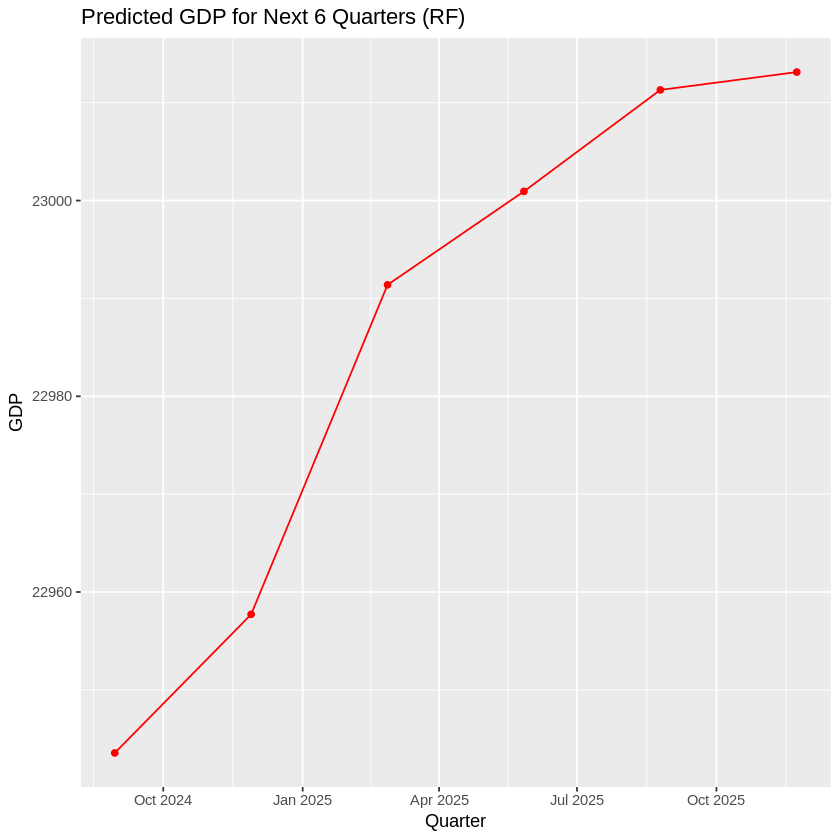

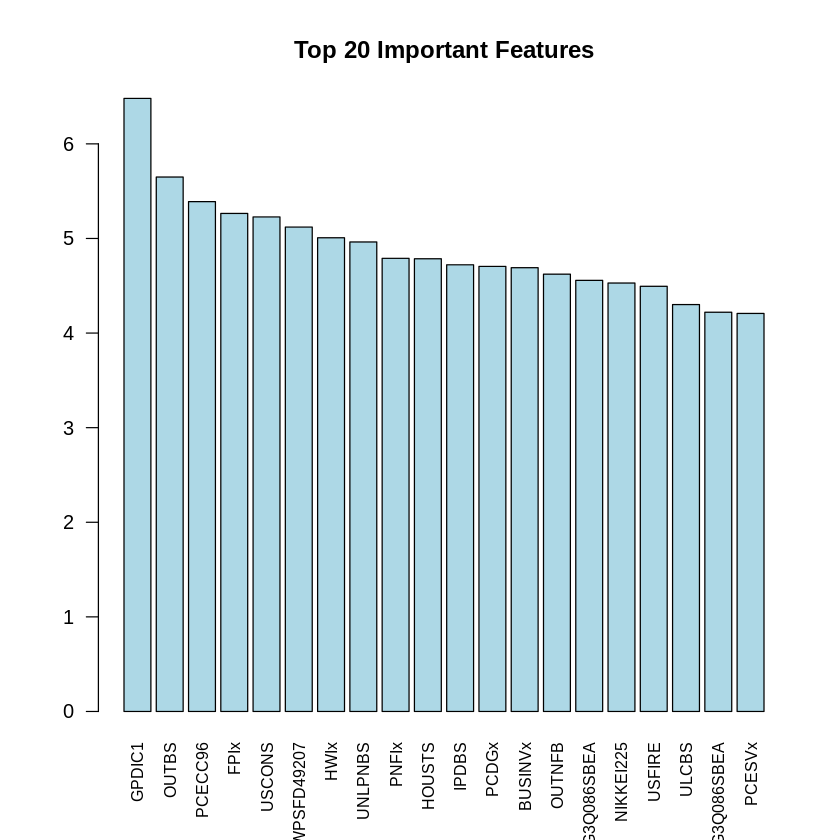

In [ ]:
### Random Forest
library(randomForest)

data <- read.csv("Quarterly Data.csv")
#removing columns with many NA values
data<- data %>% select(-c(22, 34, 70:73, 76, 79, 84, 89, 90, 92, 94, 95, 129, 131, 132, 135, 138, 142, 150, 154, 158, 166, 168, 177:182, 187, 188, 191, 192, 220, 224:229, 231, 232))
data$sasdate <- as.Date(data$sasdate, format="%m/%d/%Y")
data[, -1] <- lapply(data[, -1], as.numeric)
lag_columns <- c(1, 13, 60, 182:186)
for (col in lag_columns) {
  for (lag in 1:8) {  # Lagging up to 8 quarters
    data[[paste0(names(data)[col], "_lag_", lag)]] <- dplyr::lag(data[[col]], lag)
  }
}
data <- data[complete.cases(data), ]
train_size <-60
train_data <- tail(data, train_size)

future_gdp <- data.frame(Quarter = seq(max(data$sasdate) + 90, by=90, length.out=6),
                         Predicted_GDP = numeric(6))
for (i in 1:6) {

  # Train the Random Forest model using available data
  gdp_formula <- as.formula("GDPC1 ~ .")  # Use only known historical features
  rf_model <- randomForest(gdp_formula, data=train_data, ntree=1000, mtry=14, importance=TRUE, nodesize = 5)

  # Create a new row with the latest GDP prediction
  new_row <- train_data[nrow(train_data), ]  # Start with the last row
  new_row$sasdate <- future_gdp$Quarter[i]   # Assign future quarter

  # Predict GDP
  predicted_gdp <- predict(rf_model, newdata=new_row)
  future_gdp$Predicted_GDP[i] <- predicted_gdp

  # Append predicted GDP as if it were actual data for the next iteration
  new_row$GDPC1 <- predicted_gdp
  train_data <- rbind(train_data, new_row)  # Add new row to dataset
  train_data <- tail(train_data, train_size)  # Keep only the latest 20 quarters
}
print(future_gdp)

## calculate RMSE for 2024-09-01 prediction
RMSE_RF <- sqrt( (future_gdp_RF[1,2]- df$GDPC1[nrow(df)])^2)
print(RMSE_RF)

#plotting GDP predictions
ggplot(future_gdp, aes(x = Quarter, y = Predicted_GDP)) +
  geom_line(color = "red") +
  geom_point(color = "red") +
  labs(title = "Predicted GDP for Next 6 Quarters (RF)", x = "Quarter", y = "GDP")


# Select top 10 most important features
importance_values <- importance(rf_model)
sorted_importance <- importance_values[order(-importance_values[, 1]), ]
top_features <- sorted_importance[1:20, ]

barplot(top_features[, 1],
        main = "Top 20 Important Features",
        names.arg = rownames(top_features),
        col = "lightblue",
        las = 2,
        cex.names = 0.8)


     Quarter Predicted_GDP
1 2024-08-30      22897.24
2 2024-11-28      22900.78
3 2025-02-26      22903.99
4 2025-05-27      22906.43
5 2025-08-25      22910.09
6 2025-11-23      22911.21


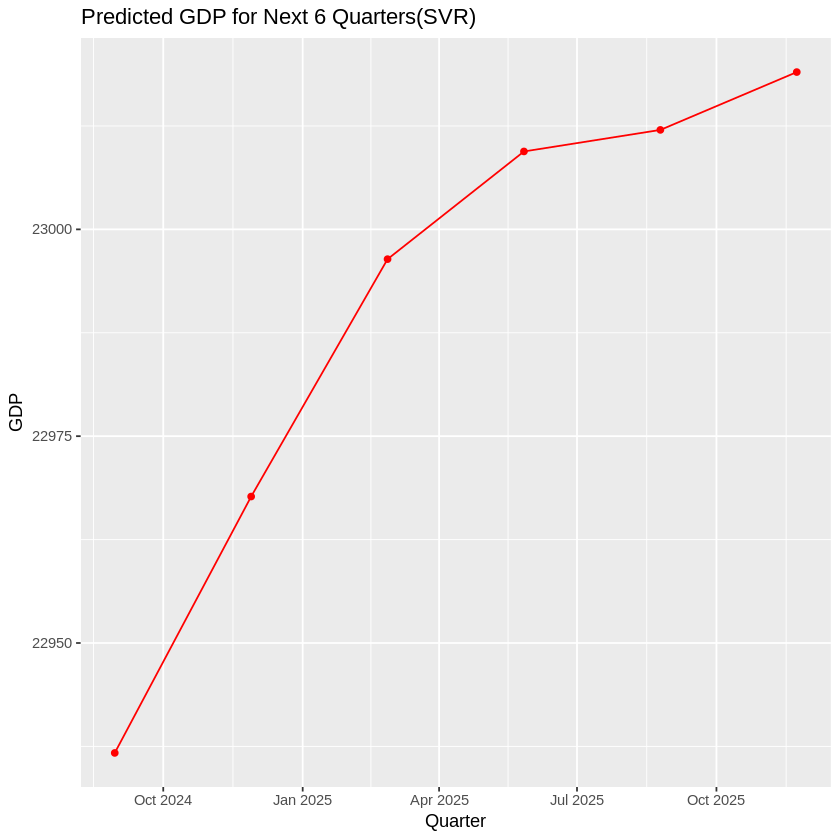

In [ ]:
### SVR

library(e1071)
data <- data[complete.cases(data), ]
train_size <-60
train_data <- tail(data, train_size)


future_gdp_SVR <- data.frame(Quarter = seq(max(data$sasdate) + 90, by=90, length.out=6),
                             Predicted_GDP = numeric(6))
for (i in 1:6) {

  # Train the Random Forest model using available data
  gdp_formula <- as.formula("GDPC1 ~ .")  # Use only known historical features
  svr_model <- svm(gdp_formula, data = train_data,  kernel = "radial", scale = TRUE)

  # Create a new row with the latest GDP prediction
  new_row <- train_data[nrow(train_data), ]  # Start with the last row
  new_row$sasdate <- future_gdp_SVR$Quarter[i]   # Assign future quarter

  # Predict GDP
  predicted_gdp <- predict(svr_model, newdata=new_row)
  future_gdp_SVR$Predicted_GDP[i] <- predicted_gdp

  # Append predicted GDP as if it were actual data for the next iteration
  new_row$GDPC1 <- predicted_gdp
  train_data <- rbind(train_data, new_row)  # Add new row to dataset
  train_data <- tail(train_data, train_size)  # Keep only the latest 20 quarters
}
print(future_gdp_SVR)

## calculation of RMSE for 2024-09-01
RMSE_SVR <- sqrt( (future_gdp_SVR[1,2]- df$GDPC1[nrow(df)])^2)
print(RMSE_SVR)

#plotting GDP predictions
ggplot(future_gdp, aes(x = Quarter, y = Predicted_GDP)) +
    geom_line(color = "red") +
    geom_point(color = "red") +
    labs(title = "Predicted GDP for Next 6 Quarters(SVR)", x = "Quarter", y = "GDP")

